# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [1]:
# if plotnine is not installed in Jupter then use the following command to install it 



Running this project require the following imports 

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

## This if i want to cluster to the maximum of 7 clusters

In [3]:
# Helper function that allows us to display data in 2 dimensions and highlights the clusters
#def display_cluster(X, clustering_model=None, num_clusters=0):
 #   color = 'brgcmyk'  # List colors
  #  alpha = 0.5  # Color opacity
   # s = 20

    #if clustering_model is None or not hasattr(clustering_model, 'labels_'):
     #   plt.scatter(X[:, 0], X[:, 1], c=color[0], alpha=alpha, s=s)
    #else:
     #   for i in range(num_clusters):
      #      plt.scatter(X[clustering_model.labels_ == i, 0], X[clustering_model.labels_ == i, 1],
       #                 c=color[i % len(color)], alpha=alpha, s=s)

## This if i want to cluster more than 7 clusters with different colors.

In [4]:
def display_cluster(X, clustering_model=None, num_clusters=0):
    alpha = 0.5  # Color opacity
    s = 20

    if clustering_model is None or not hasattr(clustering_model, 'labels_'):
        plt.scatter(X[:, 0], X[:, 1], alpha=alpha, s=s)
    else:
        unique_labels = np.unique(clustering_model.labels_)
        colors = plt.cm.get_cmap('tab10', len(unique_labels))  # Use a color map for better distinction
        for i, label in enumerate(unique_labels):
            plt.scatter(X[clustering_model.labels_ == label, 0], X[clustering_model.labels_ == label, 1],
                        color=colors(i), alpha=alpha, s=s)




## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



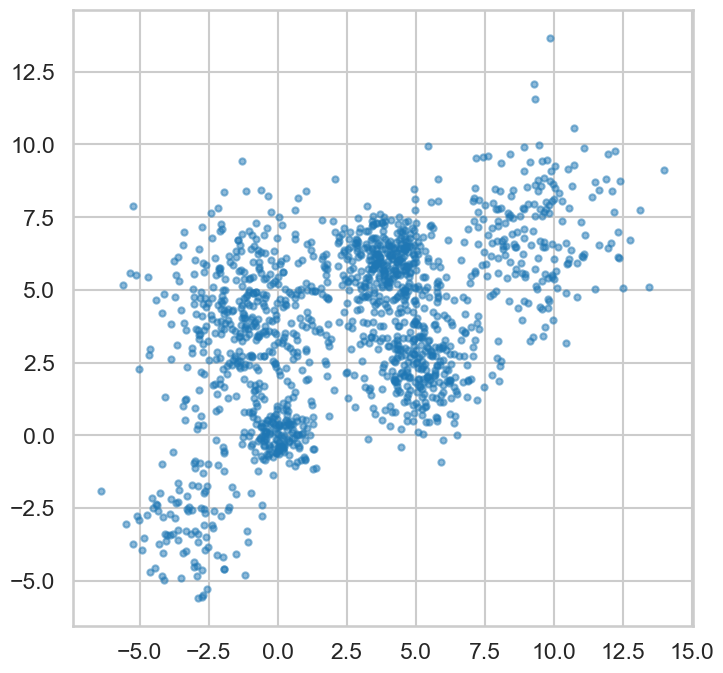

In [5]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

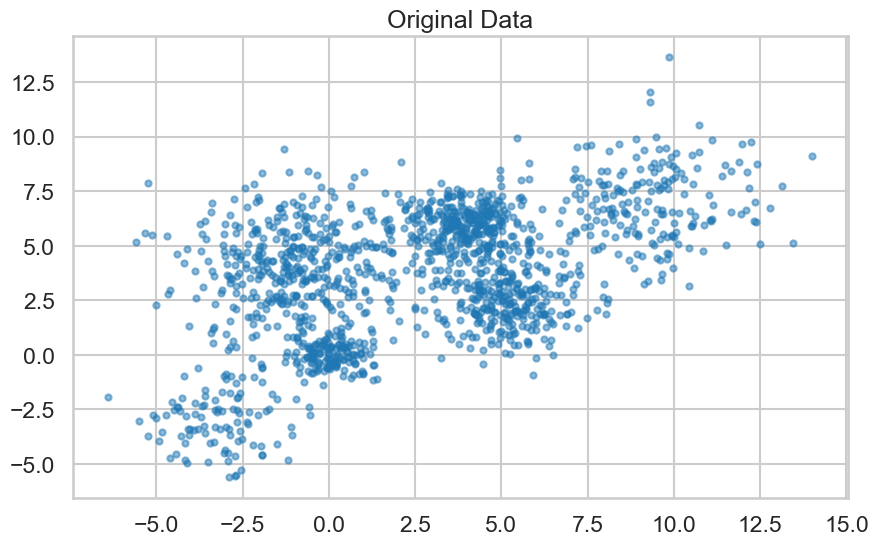

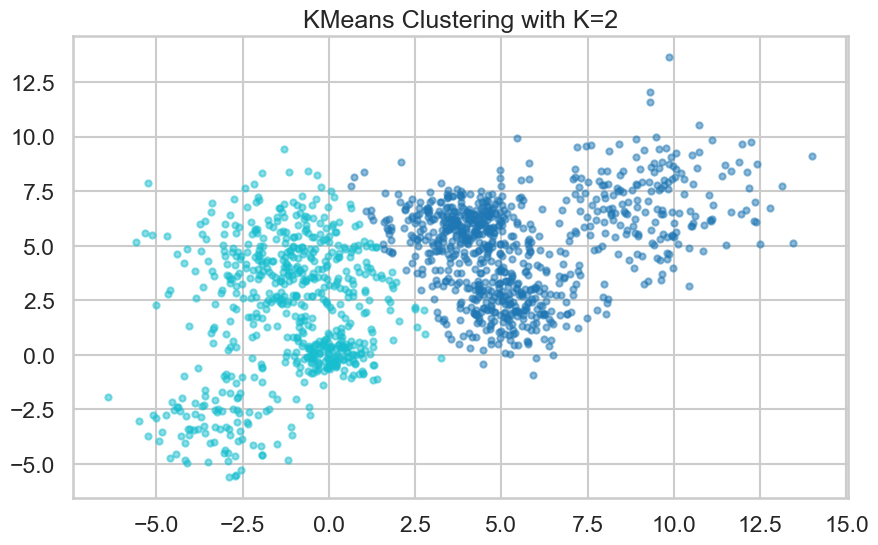

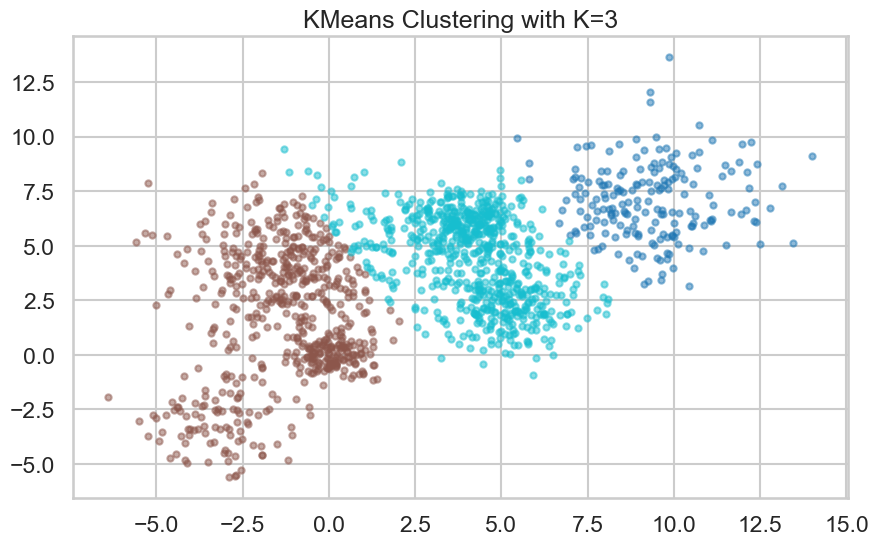

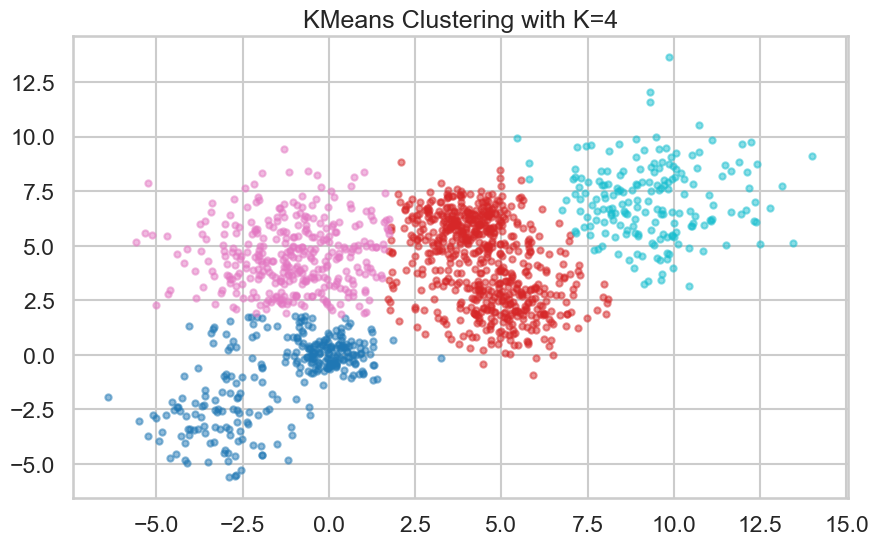

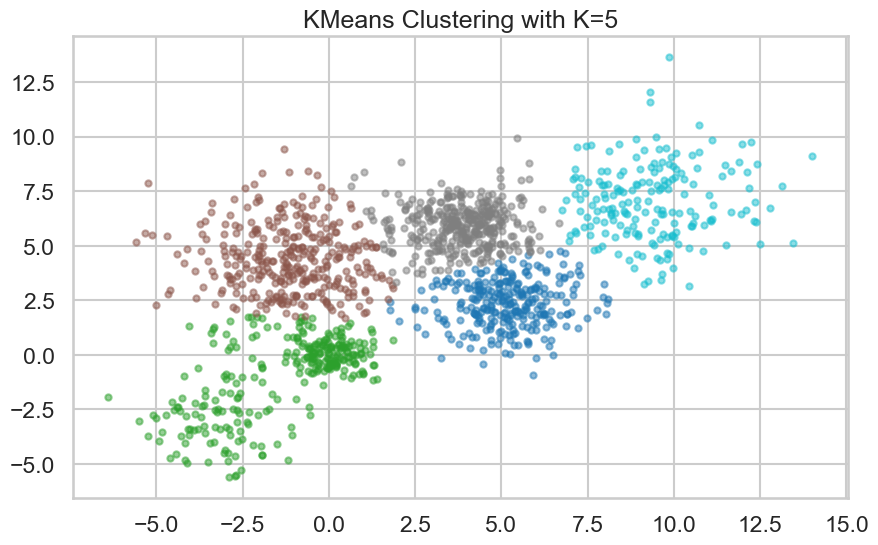

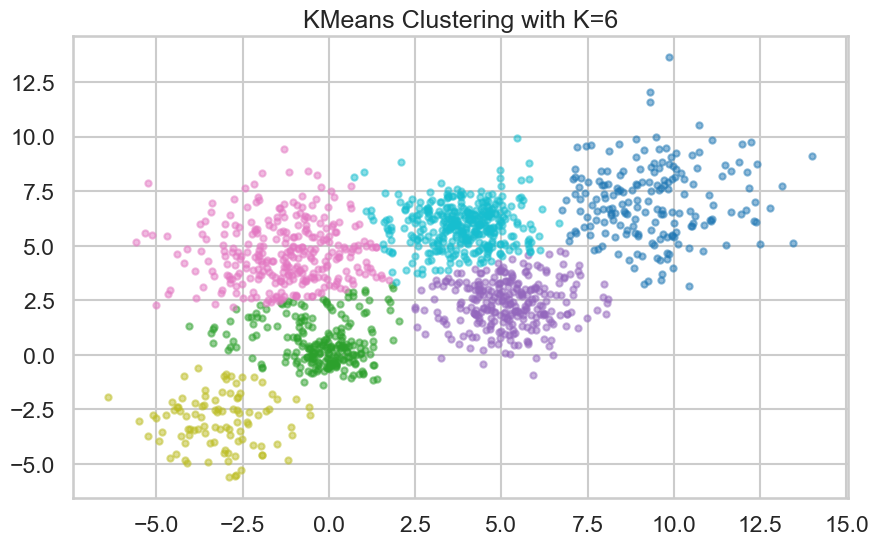

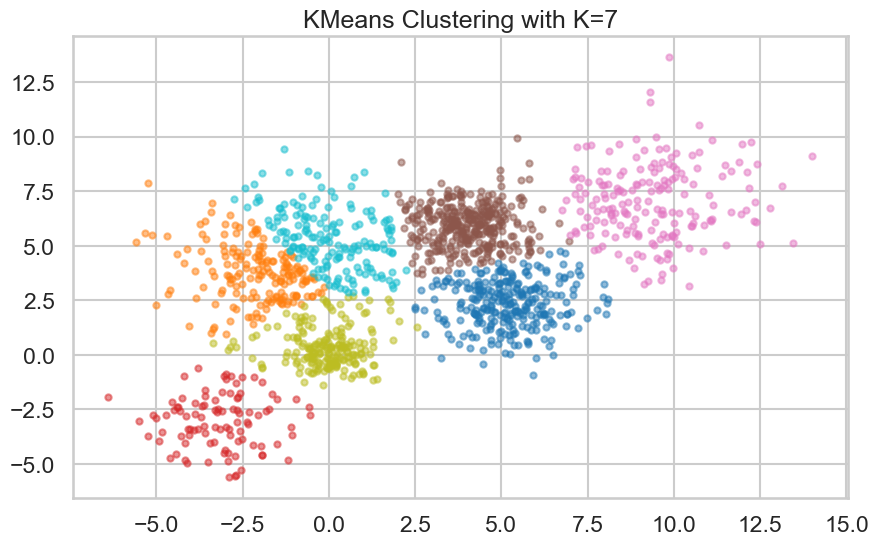

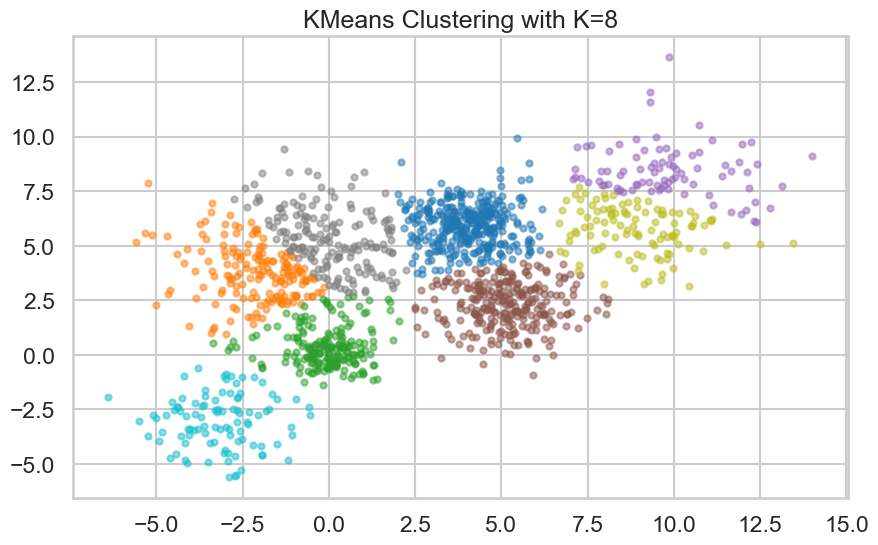

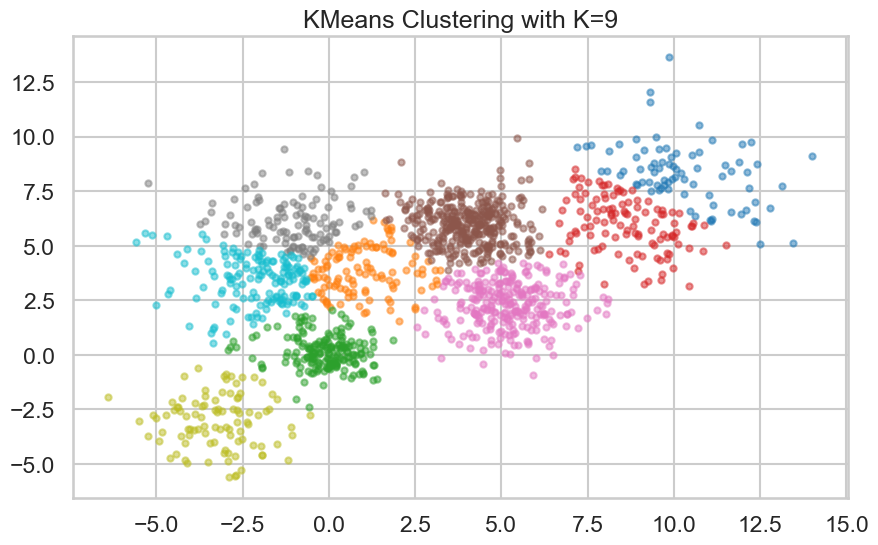

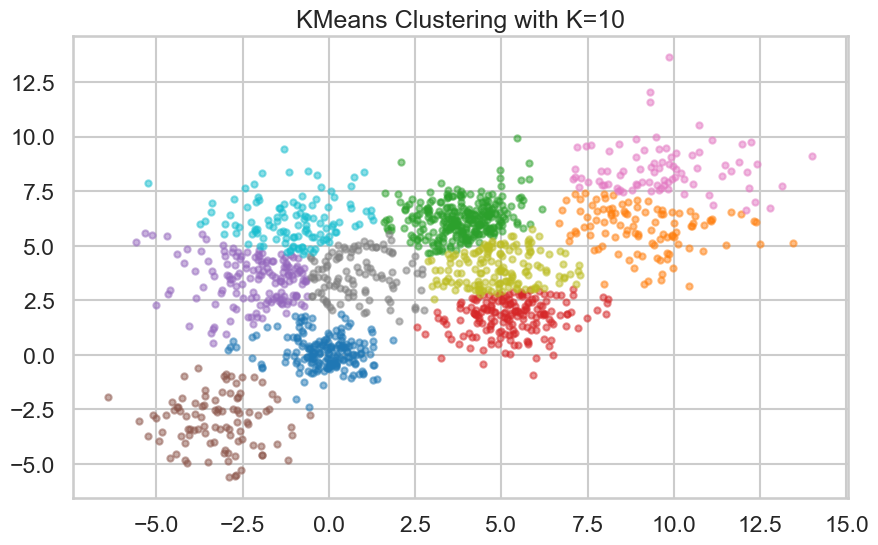

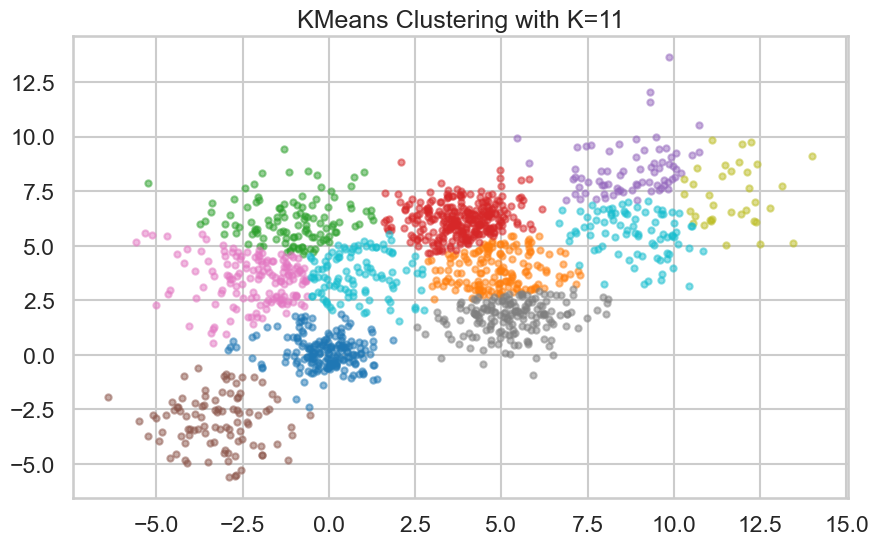

Best K based on Silhouette Score: 6


In [6]:

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np

# Display the original data
plt.figure(figsize=(10, 6))
display_cluster(Multi_blob_Data)
plt.title('Original Data')
plt.show()

# Apply KMeans with different values of K
k_values = [2, 3, 4, 5, 6,7,8,9,10,11]
silhouette_scores = []
distortion_values = []  # List to store distortion values

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    Multi_blob_Data_labels = kmeans.fit_predict(Multi_blob_Data)
    
    # Display the outcome of each value of K
    plt.figure(figsize=(10, 6))
    display_cluster(Multi_blob_Data, kmeans, num_clusters=k)
    plt.title(f'KMeans Clustering with K={k}')
    plt.show()
    
    # Plot distortion function versus K
    distortion = kmeans.inertia_
    distortion_values.append(distortion)

    # Plot silhouette_score versus K
    silhouette = silhouette_score(Multi_blob_Data, Multi_blob_Data_labels)
    silhouette_scores.append(silhouette)

# Plot distortion function versus K
#plt.plot(k_values, distortion_values, marker='o', linestyle='-', color='b')
#plt.xlabel('Number of Clusters (K)')
#plt.ylabel('Distortion')
#plt.title('Elbow Method for Optimal K')
#plt.show()

# Plot silhouette_score versus K
#plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='g')
#plt.xlabel('Number of Clusters (K)')
#plt.ylabel('Silhouette Score')
#plt.title('Silhouette Score for Optimal K')
#plt.show()

# Choose the best K based on the silhouette score
best_k = k_values[np.argmax(silhouette_scores)]
print(f'Best K based on Silhouette Score: {best_k}')



Best K based on Silhouette Score: 6


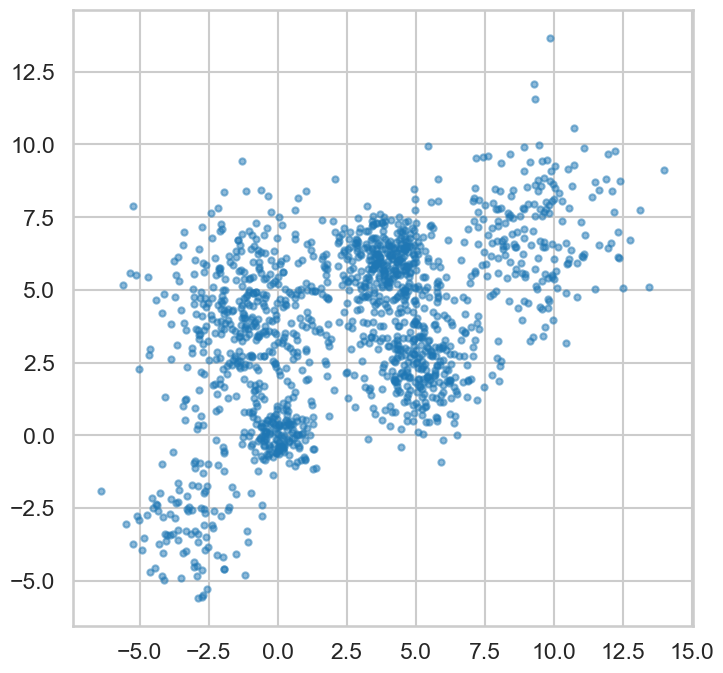

In [7]:
def find_optimal_k(data, k_values):
    silhouette_scores = []
    distortion_values = []  # List to store distortion values

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        data_labels = kmeans.fit_predict(data)

        # Display the outcome of each value of K
        #plt.figure(figsize=(10, 6))
        #display_cluster(data, kmeans, num_clusters=k)
        #plt.title(f'KMeans Clustering with K={k}')
        #plt.show()

        # Plot distortion function versus K
        distortion = kmeans.inertia_
        distortion_values.append(distortion)

        # Plot silhouette_score versus K
        silhouette = silhouette_score(data, data_labels)
        silhouette_scores.append(silhouette)

    # Plot distortion function versus K
    #plt.plot(k_values, distortion_values, marker='o', linestyle='-', color='b')
    #plt.xlabel('Number of Clusters (K)')
    #plt.ylabel('Distortion')
    #plt.title('Elbow Method for Optimal K')
    #plt.show()

    # Plot silhouette_score versus K
    #plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='g')
    #plt.xlabel('Number of Clusters (K)')
    #plt.ylabel('Silhouette Score')
    #plt.title('Silhouette Score for Optimal K')
    #plt.show()

    # Choose the best K based on the silhouette score
    best_k = k_values[np.argmax(silhouette_scores)]
    print(f'Best K based on Silhouette Score: {best_k}')

# Display the original data
#plt.figure(figsize=(10, 6))
display_cluster(Multi_blob_Data)
#plt.title('Original Data')
#plt.show()

# Apply KMeans with different values of K
k_values = [2, 3, 4, 5, 6, 7,8,9,10,11]  # Extend the list of K values as needed
find_optimal_k(Multi_blob_Data, k_values)


### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [8]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Helper function to display dendrogram
def plot_dendrogram(model, **kwargs):
    linkage_matrix = linkage(model.children_, model.linkage)
    
    #plt.figure(figsize=(15, 6))
    dendrogram(linkage_matrix, orientation='top', **kwargs)
    
    # Add a horizontal line for the distance threshold
    color_threshold = kwargs.get('color_threshold',None)
    if color_threshold is not None:
        #plt.axhline(y=color_threshold, color='r', linestyle='--', label='Distance Threshold')
        #plt.legend()


# Generate synthetic data
n_bins = 6
centers = [(-3, -3), (0, 0), (5, 2.5), (-1, 4), (4, 6), (9, 7)]
Multi_blob_Data, y = make_blobs(n_samples=[100, 150, 300, 400, 300, 200], n_features=2,
                                cluster_std=[1.3, 0.6, 1.2, 1.7, 0.9, 1.7], centers=centers, shuffle=False, random_state=42)

# Display the original data
#plt.figure(figsize=(10, 6))
display_cluster(Multi_blob_Data)
#plt.title('Original Data')
#plt.show()

# AgglomerativeClustering with different parameters
affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['average', 'single']
distance_thresholds = [None,900,900]

best_silhouette_score = float('-inf')
best_params = {}

for affinity in affinities:
    for linkage_type in linkages:
        for distance_threshold in distance_thresholds:
            # Apply AgglomerativeClustering
            if distance_threshold is not None:
                agg_clustering = AgglomerativeClustering(n_clusters=None, affinity=affinity, linkage=linkage_type,
                                                         distance_threshold=distance_threshold)
            else:
                n_clusters = 3  # Set n_clusters to the desired number
                agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage_type)

            Multi_blob_Data_labels = agg_clustering.fit_predict(Multi_blob_Data)

            # Plot dendrogram
            #plt.figure(figsize=(15, 6))
            #plot_dendrogram(agg_clustering, truncate_mode='level', p=3, color_threshold=distance_threshold)
            #plt.title(f'Dendrogram - Affinity: {affinity}, Linkage: {linkage_type}, Distance Threshold: {distance_threshold}')
            #plt.show()

            # Display the resulting clusters
            #plt.figure(figsize=(10, 6))
            #display_cluster(Multi_blob_Data, agg_clustering, num_clusters=len(set(Multi_blob_Data_labels)))
            #plt.title(f'Agglomerative Clustering - Affinity: {affinity}, Linkage: {linkage_type}, Distance Threshold: {distance_threshold}')
            #plt.show()

            # Calculate silhouette score only if there are more than 1 cluster
            if len(set(Multi_blob_Data_labels)) > 1:
                silhouette = silhouette_score(Multi_blob_Data, Multi_blob_Data_labels)
                print(f'Silhouette Score: {silhouette}')
            else:
                print("Not enough clusters for silhouette score calculation.")

            # Store the best parameters and silhouette score
            if silhouette > best_silhouette_score:
                best_silhouette_score = silhouette
                best_params = {'Affinity': affinity, 'Linkage': linkage_type, 'Distance Threshold': distance_threshold}

# Display the best parameters and silhouette score
print(f'Best Parameters: {best_params}')
print(f'Best Silhouette Score: {best_silhouette_score}')


IndentationError: expected an indented block after 'if' statement on line 17 (1767338093.py, line 23)

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
n_bins = 6
centers = [(-3, -3), (0, 0), (5, 2.5), (-1, 4), (4, 6), (9, 7)]
Multi_blob_Data, y = make_blobs(n_samples=[100, 150, 300, 400, 300, 200], n_features=2,
                                cluster_std=[1.3, 0.6, 1.2, 1.7, 0.9, 1.7], centers=centers, shuffle=False, random_state=42)

# Helper function to display clusters for DBScan
def display_dbscan_clusters(X, dbscan_model):
    unique_labels = set(dbscan_model.labels_)
    num_clusters = len(unique_labels) - (1 if -1 in dbscan_model.labels_ else 0)

    for i, label in enumerate(unique_labels):
        if label == -1:
            #plt.scatter(X[dbscan_model.labels_ == label, 0], X[dbscan_model.labels_ == label, 1],
                        c='gray', alpha=0.5, s=20, label='Noise')
        else:
            #plt.scatter(X[dbscan_model.labels_ == label, 0], X[dbscan_model.labels_ == label, 1],
                        alpha=0.5, s=20, label=f'Cluster {i}')

    #plt.legend()
    #plt.title(f'DBScan Clustering - EPS: {dbscan_model.eps}, Min Samples: {dbscan_model.min_samples}')
    #plt.show()

# Parameters to try
eps_values = np.arange(0.1, 3.1, 0.5)
min_samples_values = range(5, 26)

best_silhouette_score = float('-inf')
best_params = {}


# Loop over parameter combinations
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan_model.fit_predict(Multi_blob_Data)
        
        # Ignore cases where there is only one cluster
        if len(set(dbscan_labels)) > 1:
            silhouette = silhouette_score(Multi_blob_Data, dbscan_labels)
            print(f'EPS: {eps}, Min Samples: {min_samples}, Silhouette Score: {silhouette}')

            # Update best parameters if a better silhouette score is found
            if silhouette > best_silhouette_score:
                best_silhouette_score = silhouette
                best_params = {'EPS': eps, 'Min Samples': min_samples}

            # Display clusters for the current parameters
            #plt.figure(figsize=(10, 6))
            display_dbscan_clusters(Multi_blob_Data, dbscan_model)

# Display the best parameters and silhouette score
print(f'Best Parameters: {best_params}')
print(f'Best Silhouette Score: {best_silhouette_score}')


In [ ]:
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Generate synthetic data
n_bins = 6
centers = [(-3, -3), (0, 0), (5, 2.5), (-1, 4), (4, 6), (9, 7)]
Multi_blob_Data, y = make_blobs(n_samples=[100, 150, 300, 400, 300, 200], n_features=2,
                                cluster_std=[1.3, 0.6, 1.2, 1.7, 0.9, 1.7], centers=centers, shuffle=False, random_state=42)

# Visualize the original data
#plt.figure(figsize=(8, 8))
#plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], alpha=0.5, s=20)
#plt.title('Original Data')
#plt.show()

# Convert data to pandas DataFrame
df = pd.DataFrame(Multi_blob_Data, columns=['Feature1', 'Feature2'])

# Parameters to try
eps_values = np.arange(0.1, 3.1, 1)
min_samples_values = range(5, 26)

best_silhouette_score = float('-inf')
best_params = {}

# Loop over parameter combinations
for eps, min_samples in itertools.product(eps_values, min_samples_values):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    current_clusters = dbscan.fit_predict(df)
    unique_labels = np.unique(current_clusters)

    if len(unique_labels) > 1:  # Check if more than one cluster is formed
        # Display clusters for the current parameters
        #plt.figure(figsize=(10, 6))
        #plt.scatter(df['Feature1'], df['Feature2'], c=current_clusters, alpha=0.5, s=20)
        #plt.title(f'DBScan Clustering - EPS: {eps}, Min Samples: {min_samples}')
        #plt.show()

        # Calculate silhouette score
        valid_labels = current_clusters != -1
        silhouette = silhouette_score(df, current_clusters)
        print(f'EPS: {eps}, Min Samples: {min_samples}, Silhouette Score: {silhouette}')

        # Update best parameters if a better silhouette score is found
        if silhouette > best_silhouette_score:
            best_silhouette_score = silhouette
            best_params = {'EPS': eps, 'Min Samples': min_samples}

# Display the best parameters and silhouette score
print(f'Best Parameters: {best_params}')
print(f'Best Silhouette Score: {best_silhouette_score}')


### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.patches as patches

# Generate synthetic data
n_samples = [100, 150, 300, 400, 300, 200]
centers = [(-3, -3), (0, 0), (5, 2.5), (-1, 4), (4, 6), (9, 7)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=[1.3, 0.6, 1.2, 1.7, 0.9, 1.7], centers=centers, shuffle=False, random_state=42)

# Fit Gaussian Mixture Model with different covariance types
covariance_types = ['full', 'tied', 'diag', 'spherical']
#plt.figure(figsize=(15, 10))

for i, cov_type in enumerate(covariance_types, 1):
    gmm = GaussianMixture(n_components=len(centers), covariance_type=cov_type, random_state=42)
    gmm.fit(X)
    
    # Plot 2D contour plot for each component
    #plt.subplot(2, 2, i)
    #plt.scatter(X[:, 0], X[:, 1], c=gmm.predict(X), cmap='viridis', s=20, alpha=0.7)
    #plt.title(f'GMM with Covariance Type: {cov_type}')
    
    # Plot ellipses for each component
    for j in range(min(len(gmm.covariances_), len(centers))):
        mean = gmm.means_[j]
        
        if cov_type == 'spherical':
            var = gmm.covariances_[j]
            covar = np.diag(var * np.ones_like(mean))  # Construct a diagonal covariance matrix
        else:
            covar = gmm.covariances_[j]
            
        if len(covar.shape) == 1:
            # Handling the case where covar is 1-dimensional (spherical case)
            covar = np.diag(covar * np.ones_like(mean))  # Construct a diagonal covariance matrix
            
        try:
            covar = covar.reshape(2, 2)
        except ValueError:
            # Handling the case where covar is still not 2D (e.g., 'spherical' case)
            covar = np.diag(covar * np.ones_like(mean))  # Construct a diagonal covariance matrix
            
        v, w = np.linalg.eigh(covar)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / np.linalg.norm(w[0])
        
        angle = np.arctan(u[1] / u[0])
        angle = 180.0 + angle * 180.0 / np.pi
        ell = patches.Ellipse(mean, v[0], v[1], angle, color='red', alpha=0.5)
        plt.gca().add_patch(ell)

plt.tight_layout()
plt.show()







## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.patches as patches

# Load Iris dataset
iris_data = load_iris()
X_iris = iris_data.data

# Create a DataFrame with the dataset and column names
iris_df = pd.DataFrame(X_iris, columns=iris_data.feature_names)

target = iris_data.target  # Add this line to get the target values

# Create a DataFrame with the dataset and column names
iris_df = pd.DataFrame(X_iris, columns=iris_data.feature_names)
iris_df['target'] = target  # Add this line to include the 'target' column


# Print the first few lines of the dataset
print(iris_df.head())


In [ ]:
# Scatter plot of the first two features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=iris_df['sepal length (cm)'], y=iris_df['sepal width (cm)'], hue=iris_df['target'], palette='viridis', s=70, alpha=0.8)
plt.title('Scatter Plot of Iris Dataset (Original)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Target', loc='upper right')
plt.show()


## This kmean clustering on iris data before normalizing the data

In [ ]:
def perform_clustering(X, algorithm, algorithm_name, normalize=False, print_silhouette=True):
    # Normalize the data if specified
    if normalize:
        scaler = StandardScaler()
        X_normalized = scaler.fit_transform(X)
    else:
        X_normalized = X

    # Apply the clustering algorithm
    clustering_algorithm = algorithm
    labels = clustering_algorithm.fit_predict(X_normalized)

    # Visualize the clusters using PCA for dimensionality reduction
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_normalized)

    #plt.figure(figsize=(10, 6))
    #plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_normalized, labels)
    
    # Display silhouette score below the plot
    #plt.title(f'{algorithm_name} Clustering')
    #plt.show()
    
    print(f'Silhouette Score for {algorithm_name}: {silhouette_avg:.3f}\n')

    return silhouette_avg

In [ ]:
# K-Means Clustering
num_clusters_range = range(2, 7)

for k in num_clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    perform_clustering(X_iris, kmeans, f'K-Means (k={k})')


## *This agglomerative clustering on iris data before normalizing the data

In [ ]:
# Helper function to display clusters for Agglomerative Clustering
def display_agglomerative_clusters(X, linkage_matrix, threshold):
    # Cluster the data using the threshold
    clustered_labels = fcluster(linkage_matrix, threshold, criterion='distance')

    # Display clustered data
    #plt.figure(figsize=(10, 6))

    # Plot all data points with the same color
    #plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.5, s=20, label='Noise')

    # Plot clustered data points with different colors
    unique_labels = np.unique(clustered_labels)
    colors = plt.cm.get_cmap('tab10', len(unique_labels))

    for i, label in enumerate(unique_labels):
        if label != 0:  # Exclude noise points
            plt.scatter(X[clustered_labels == label, 0], X[clustered_labels == label, 1],
                        color=colors(i), alpha=0.5, s=20, label=f'Cluster {label}')

    #plt.title(f'Agglomerative Clustering with Threshold {threshold}')
    #plt.xlabel('Feature 1')
    #plt.ylabel('Feature 2')
    #plt.legend()
    #plt.show()

# Calculate linkage matrix for dendrogram
linkage_matrix = linkage(X_iris, method='ward')

# Plot dendrogram for all data points
#plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, orientation='top', labels=None, distance_sort='descending')

# Set a threshold for clustering
threshold = 3  # You can adjust this threshold
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold: {threshold}')
plt.legend()

#plt.title('Agglomerative Clustering Dendrogram with Threshold')
#plt.xlabel('Data Points')
#plt.ylabel('Distance')
#plt.show()

# Display clustered data using the threshold
display_agglomerative_clusters(X_iris, linkage_matrix, threshold)


## *This DBSCAN clustering on iris data before normalizing the data

In [ ]:
# DBSCAN Clustering
eps_values = [0.3, 0.5, 0.8,1]
min_samples_values = [3, 5, 7,9]

best_silhouette_score = float('-inf')
best_params = {}

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        silhouette_avg = perform_clustering(X_iris, dbscan, f'DBSCAN (EPS={eps}, Min Samples={min_samples})', normalize=True, print_silhouette=False)

        # Update best parameters if a better silhouette score is found
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_params = {'EPS': eps, 'Min Samples': min_samples}

# Display the best parameters and silhouette score
print(f'Best Parameters: {best_params}')
print(f'Best Silhouette Score: {best_silhouette_score}')

## *This GMM clustering on iris data before normalizing the data

In [ ]:
# Gaussian Mixture Model (GMM)
n_components_range = range(2, 7)

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components)
    perform_clustering(X_iris, gmm, f'Gaussian Mixture Model (n_components={n_components})', normalize=True)


## Now repeat all the clustering techniques on the iris data set but after normalizing the data 

##  *This KMean clustering on iris data after normalizing the data

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_iris_normalized = scaler.fit_transform(X_iris)

# K-Means Clustering on the normalized data
num_clusters_range = range(2, 6)

for k in num_clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    perform_clustering(X_iris_normalized, kmeans, f'K-Means (k={k})', normalize=True)


## *This AGGLOMERATIVE clustering on iris data AFTER normalizing the data

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_iris_normalized = scaler.fit_transform(X_iris)

# Helper function to display clusters for Agglomerative Clustering
def display_agglomerative_clusters(X, linkage_matrix, threshold):
    # Cluster the data using the threshold
    clustered_labels = fcluster(linkage_matrix, threshold, criterion='distance')

    # Display clustered data
    #plt.figure(figsize=(10, 6))

    # Plot all data points with the same color
    #plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.5, s=20, label='Noise')

    # Plot clustered data points with different colors
    unique_labels = np.unique(clustered_labels)
    colors = plt.cm.get_cmap('tab10', len(unique_labels))

    for i, label in enumerate(unique_labels):
        if label != 0:  # Exclude noise points
            #plt.scatter(X[clustered_labels == label, 0], X[clustered_labels == label, 1],
                        color=colors(i), alpha=0.5, s=20, label=f'Cluster {label}')

    #plt.title(f'Agglomerative Clustering with Threshold {threshold}')
    #plt.xlabel('Feature 1')
    #plt.ylabel('Feature 2')
    #plt.legend()
    #plt.show()

# Calculate linkage matrix for dendrogram
linkage_matrix = linkage(X_iris_normalized, method='ward')

# Plot dendrogram for all data points
#plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, orientation='top', labels=None, distance_sort='descending')

# Set a threshold for clustering
threshold = 3  # You can adjust this threshold
#plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold: {threshold}')
#plt.legend()

#plt.title('Agglomerative Clustering Dendrogram with Threshold')
#plt.xlabel('Data Points')
#plt.ylabel('Distance')
#plt.show()

# Display clustered data using the threshold
display_agglomerative_clusters(X_iris_normalized, linkage_matrix, threshold)


## *This DBSCAN clustering on iris data AFTER normalizing the data

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_iris_normalized = scaler.fit_transform(X_iris)

# DBSCAN Clustering
eps_values = [0.3, 0.5, 0.8]
min_samples_values = [3, 5, 7]

best_silhouette_score = float('-inf')
best_params = {}

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        silhouette_avg = perform_clustering(X_iris_normalized, dbscan, f'DBSCAN (EPS={eps}, Min Samples={min_samples})', normalize=False, print_silhouette=False)

        # Update best parameters if a better silhouette score is found
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_params = {'EPS': eps, 'Min Samples': min_samples}

# Display the best parameters and silhouette score
print(f'Best Parameters: {best_params}')
print(f'Best Silhouette Score: {best_silhouette_score}')


## *This GMM clustering on iris data AFTER normalizing the data

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_iris_normalized = scaler.fit_transform(X_iris)

# Gaussian Mixture Model (GMM) Clustering
n_components_range = range(2, 6)

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components)
    perform_clustering(X_iris_normalized, gmm, f'Gaussian Mixture Model (n_components={n_components})', normalize=False)

## Customer dataset
Repeat all the above on the customer data set 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Read the customer dataset from the CSV file
customer_data = pd.read_csv('/Users/maria/Desktop/semster10/ML/ASSIGNM/1/Customer data.csv')

# Extract the feature columns (assuming the first column is the target variable)
X_customer = customer_data.iloc[:, 1:]

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_customer_pca = pca.fit_transform(X_customer)

# Visualize the original data using PCA
#plt.figure(figsize=(10, 6))
#sns.scatterplot(x=X_customer_pca[:, 0], y=X_customer_pca[:, 1])
#plt.title('Customer Data - PCA')
#plt.xlabel('Principal Component 1')
#plt.ylabel('Principal Component 2')
#plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Standardize the data
scaler = StandardScaler()
X_customer_std = scaler.fit_transform(X_customer)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_customer_std)

# Visualize KMeans clustering results
#plt.figure(figsize=(10, 6))
#sns.scatterplot(x=X_customer_pca[:, 0], y=X_customer_pca[:, 1], hue=kmeans_labels, palette='viridis', legend='full')
#plt.title('KMeans Clustering Results (Customer Data)')
#plt.xlabel('Principal Component 1')
#plt.ylabel('Principal Component 2')
#plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative_labels = agglomerative.fit_predict(X_customer_std)

# Visualize Agglomerative clustering results
#plt.figure(figsize=(10, 6))
#sns.scatterplot(x=X_customer_pca[:, 0], y=X_customer_pca[:, 1], hue=agglomerative_labels, palette='viridis', legend='full')
#plt.title('Agglomerative Clustering Results (Customer Data)')
#plt.xlabel('Principal Component 1')
#plt.ylabel('Principal Component 2')
#plt.show()


In [ ]:
from sklearn.cluster import DBSCAN

# DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_customer_std)

# Visualize DBSCAN clustering results
#plt.figure(figsize=(10, 6))
#sns.scatterplot(x=X_customer_pca[:, 0], y=X_customer_pca[:, 1], hue=dbscan_labels, palette='viridis', legend='full')
#plt.title('DBSCAN Clustering Results (Customer Data)')
#plt.xlabel('Principal Component 1')
#plt.ylabel('Principal Component 2')
#plt.show()


In [ ]:
import pandas as pd

# Load customer data
customer_data_path = '/Users/maria/Desktop/semster10/ML/ASSIGNM/1/Customer data.csv'
customer_data = pd.read_csv(customer_data_path)

# Display the first few rows of the dataset to identify the correct column names
print(customer_data.head())


## *This KMEAN clustering on customer data before normalizing the data

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load your customer data (replace 'your_data.csv' with the actual path)
customer_data = pd.read_csv('/Users/maria/Desktop/semster10/ML/ASSIGNM/1/Customer data.csv')

# Specify the features for clustering (replace 'feature1' and 'feature2' with actual column names)
feature1 = 'Age'
feature2 = 'Income'

# Extract the selected features
X_customer = customer_data[[feature1, feature2]]

# Visualize the original data
#plt.figure(figsize=(10, 6))
#sns.scatterplot(x=feature1, y=feature2, data=customer_data, s=70, alpha=0.8)
#plt.title('Scatter Plot of Customer Data (Original)')
#plt.xlabel(feature1)
#plt.ylabel(feature2)
#plt.show()

# Specify the range of clusters
num_clusters_range = range(2, 10)

# Iterate over the cluster range
for k in num_clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    perform_clustering(X_customer, kmeans, f'K-Means (k={k})')



## *This AGGLOMERATIVE clustering on customer data before normalizing the data

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

# Specify the features for clustering
feature1 = 'Age'
feature2 = 'Income'

# Extract the selected features
X_customer = customer_data[[feature1, feature2]]

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_customer_normalized = scaler.fit_transform(X_customer)

# Helper function to display clusters for Agglomerative Clustering
def display_agglomerative_clusters(X, linkage_matrix, threshold):
    # Cluster the data using the threshold
    clustered_labels = fcluster(linkage_matrix, threshold, criterion='distance')

    # Display clustered data
    #plt.figure(figsize=(10, 6))

    # Plot all data points with the same color
    #plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.5, s=20, label='Noise')

    # Plot clustered data points with different colors
    unique_labels = np.unique(clustered_labels)
    colors = plt.cm.get_cmap('tab10', len(unique_labels))

    for i, label in enumerate(unique_labels):
        if label != 0:  # Exclude noise points
            plt.scatter(X[clustered_labels == label, 0], X[clustered_labels == label, 1],
                        color=colors(i), alpha=0.5, s=20, label=f'Cluster {label}')

    #plt.title(f'Agglomerative Clustering with Threshold {threshold}')
    #plt.xlabel(feature1)
    #plt.ylabel(feature2)
    #plt.legend()
    #plt.show()

# Calculate linkage matrix for dendrogram
linkage_matrix = linkage(X_customer_normalized, method='ward')

# Plot dendrogram for all data points
#plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, orientation='top', labels=None, distance_sort='descending')

# Set a threshold for clustering
threshold = 40  # You can adjust this threshold
#plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold: {threshold}')
#plt.legend()

#plt.title('Agglomerative Clustering Dendrogram with Threshold')
#plt.xlabel('Data Points')
#plt.ylabel('Distance')
#plt.show()

# Display clustered data using the threshold
display_agglomerative_clusters(X_customer_normalized, linkage_matrix, threshold)


## *This DBSCAN clustering on customer data before normalizing the data

In [ ]:
# Select 'Age' feature for clustering
X_customer_age = customer_data[['Age']].values

# Parameters to try
eps_values = np.arange(0.1, 3.1, 0.5)
min_samples_values = range(5, 26)

best_silhouette_score = float('-inf')
best_params = {}

# Loop over parameter combinations
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan_model.fit_predict(X_customer_age)
        
        # Ignore cases where there is only one cluster
        if len(set(dbscan_labels)) > 1:
            silhouette = silhouette_score(X_customer_age, dbscan_labels)
            print(f'EPS: {eps}, Min Samples: {min_samples}, Silhouette Score: {silhouette}')

            # Update best parameters if a better silhouette score is found
            if silhouette > best_silhouette_score:
                best_silhouette_score = silhouette
                best_params = {'EPS': eps, 'Min Samples': min_samples}

            # Display clusters for the current parameters
            #plt.figure(figsize=(10, 6))
            #plt.scatter(X_customer_age[:, 0], np.zeros_like(X_customer_age), c=dbscan_labels, cmap='viridis', s=50, alpha=0.8)
            #plt.title(f'DBScan Clustering - EPS: {eps}, Min Samples: {min_samples}')
            #plt.show()

# Display the best parameters and silhouette score
print(f'Best Parameters: {best_params}')
print(f'Best Silhouette Score: {best_silhouette_score}')


## By using the PCA ON 2 FEATURES

## *This DBSCAN clustering on customer data before normalizing the data

In [ ]:
from sklearn.decomposition import PCA

# Select 'Age' and 'Income' features for clustering
selected_features = ['Age', 'Income']
X_customer_selected = customer_data[selected_features].values

# Normalize the data using StandardScaler before PCA
scaler = StandardScaler()
X_customer_selected_normalized = scaler.fit_transform(X_customer_selected)

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_customer_pca = pca.fit_transform(X_customer_selected_normalized)

# Parameters to try
eps_values = np.arange(0.1, 3.1, 0.5)
min_samples_values = range(5, 26)

best_silhouette_score = float('-inf')
best_params = {}

# Loop over parameter combinations
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan_model.fit_predict(X_customer_pca)
        
        # Ignore cases where there is only one cluster
        if len(set(dbscan_labels)) > 1:
            silhouette = silhouette_score(X_customer_pca, dbscan_labels)
            print(f'EPS: {eps}, Min Samples: {min_samples}, Silhouette Score: {silhouette}')

            # Update best parameters if a better silhouette score is found
            if silhouette > best_silhouette_score:
                best_silhouette_score = silhouette
                best_params = {'EPS': eps, 'Min Samples': min_samples}

            # Display clusters for the current parameters
            plt.figure(figsize=(10, 6))
            plt.scatter(X_customer_pca[:, 0], X_customer_pca[:, 1], c=dbscan_labels, cmap='viridis', s=50, alpha=0.8)
            plt.title(f'DBScan Clustering with PCA - EPS: {eps}, Min Samples: {min_samples}')
            plt.xlabel('Principal Component 1')
            plt.ylabel('Principal Component 2')
            plt.show()

# Display the best parameters and silhouette score
print(f'Best Parameters: {best_params}')
print(f'Best Silhouette Score: {best_silhouette_score}')


## *This DBSCAN clustering on customer data before normalizing the data

In [ ]:
# Select two features for clustering (e.g., 'Age' and 'Income')
X_customer_selected = customer_data[['Age', 'Income']].values

# GMM Clustering
n_components_range = range(2, 9)

best_silhouette_score = float('-inf')
best_params = {}

# Loop over different numbers of components
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components)
    gmm_labels = gmm.fit_predict(X_customer_selected)
    
    # Calculate silhouette score
    silhouette = silhouette_score(X_customer_selected, gmm_labels)
    print(f'Number of Components: {n_components}, Silhouette Score: {silhouette}')

    # Update best parameters if a better silhouette score is found
    if silhouette > best_silhouette_score:
        best_silhouette_score = silhouette
        best_params = {'Number of Components': n_components}

    # Display clusters for the current number of components
    plt.figure(figsize=(10, 6))
    plt.scatter(X_customer_selected[:, 0], X_customer_selected[:, 1], c=gmm_labels, cmap='viridis', s=50, alpha=0.8)
    plt.title(f'GMM Clustering - Number of Components: {n_components}')
    plt.show()

# Display the best parameters and silhouette score
print(f'Best Parameters: {best_params}')
print(f'Best Silhouette Score: {best_silhouette_score}')


## Now repeat the same clustering techniques on the normalized data of the customer data

## *This KMEAN clustering on customer data AFTER normalizing the data

In [ ]:
feature1 = 'Age'
feature2 = 'Income'

# Extract the selected features
X_customer = customer_data[[feature1, feature2]]

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_customer_normalized = scaler.fit_transform(X_customer)

# Visualize the original data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature1, y=feature2, data=customer_data, s=70, alpha=0.8)
plt.title('Scatter Plot of Customer Data (Original)')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()

# Specify the range of clusters
num_clusters_range = range(2, 10)

# Iterate over the cluster range
for k in num_clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    perform_clustering(X_customer_normalized, kmeans, f'K-Means (k={k})')


## *This AGGLOMERATIVE clustering on CUSTOMER data AFTER normalizing the data

In [ ]:
from sklearn.metrics import silhouette_score

# Specify the features for clustering
feature1 = 'Age'
feature2 = 'Income'

# Extract the selected features
X_customer = customer_data[[feature1, feature2]]

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_customer_normalized = scaler.fit_transform(X_customer)

# Helper function to display clusters for Agglomerative Clustering
def display_agglomerative_clusters(X, linkage_matrix, threshold):
    # Cluster the data using the threshold
    clustered_labels = fcluster(linkage_matrix, threshold, criterion='distance')

    # Display clustered data
    plt.figure(figsize=(10, 6))

    # Plot all data points with the same color
    plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.5, s=20, label='Noise')

    # Plot clustered data points with different colors
    unique_labels = np.unique(clustered_labels)
    colors = plt.cm.get_cmap('tab10', len(unique_labels))

    for i, label in enumerate(unique_labels):
        if label != 0:  # Exclude noise points
            plt.scatter(X[clustered_labels == label, 0], X[clustered_labels == label, 1],
                        color=colors(i), alpha=0.5, s=20, label=f'Cluster {label}')

    plt.title(f'Agglomerative Clustering with Threshold {threshold}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend()
    plt.show()

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, clustered_labels)
    print(f'Silhouette Score: {silhouette_avg}\n')

# Calculate linkage matrix for dendrogram
linkage_matrix = linkage(X_customer_normalized, method='ward')

# Plot dendrogram for all data points
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, orientation='top', labels=None, distance_sort='descending')

# Set a threshold for clustering
threshold = 15  # You can adjust this threshold
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold: {threshold}')
plt.legend()

plt.title('Agglomerative Clustering Dendrogram with Threshold')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Display clustered data using the threshold and calculate silhouette score
display_agglomerative_clusters(X_customer_normalized, linkage_matrix, threshold)


## *This DBSCAN clustering on CUSTOMER data AFTER normalizing the data

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Select 'Age' feature for clustering
X_customer_age = customer_data[['Age']].values

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_customer_age_normalized = scaler.fit_transform(X_customer_age)

# Parameters to try
eps_values = np.arange(0.1, 3.1, 0.5)
min_samples_values = range(5, 26)

best_silhouette_score = float('-inf')
best_params = {}

# Loop over parameter combinations
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan_model.fit_predict(X_customer_age_normalized)
        
        # Ignore cases where there is only one cluster
        if len(set(dbscan_labels)) > 1:
            silhouette = silhouette_score(X_customer_age_normalized, dbscan_labels)
            print(f'EPS: {eps}, Min Samples: {min_samples}, Silhouette Score: {silhouette}')

            # Update best parameters if a better silhouette score is found
            if silhouette > best_silhouette_score:
                best_silhouette_score = silhouette
                best_params = {'EPS': eps, 'Min Samples': min_samples}

            # Display clusters for the current parameters
            plt.figure(figsize=(10, 6))
            plt.scatter(X_customer_age_normalized[:, 0], np.zeros_like(X_customer_age_normalized), c=dbscan_labels, cmap='viridis', s=50, alpha=0.8)
            plt.title(f'DBScan Clustering - EPS: {eps}, Min Samples: {min_samples}')
            plt.show()

# Display the best parameters and silhouette score
print(f'Best Parameters: {best_params}')
print(f'Best Silhouette Score: {best_silhouette_score}')


## *This GMM clustering on CUSTOMER data AFTER normalizing the data

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Select two features for clustering (e.g., 'Age' and 'Income')
X_customer_selected = customer_data[['Age', 'Income']].values

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_customer_selected_normalized = scaler.fit_transform(X_customer_selected)

# GMM Clustering
n_components_range = range(2, 9)

best_silhouette_score = float('-inf')
best_params = {}

# Loop over different numbers of components
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components)
    gmm_labels = gmm.fit_predict(X_customer_selected_normalized)
    
    # Calculate silhouette score
    silhouette = silhouette_score(X_customer_selected_normalized, gmm_labels)
    print(f'Number of Components: {n_components}, Silhouette Score: {silhouette}')

    # Update best parameters if a better silhouette score is found
    if silhouette > best_silhouette_score:
        best_silhouette_score = silhouette
        best_params = {'Number of Components': n_components}

    # Display clusters for the current number of components
    plt.figure(figsize=(10, 6))
    plt.scatter(X_customer_selected_normalized[:, 0], X_customer_selected_normalized[:, 1], c=gmm_labels, cmap='viridis', s=50, alpha=0.8)
    plt.title(f'GMM Clustering - Number of Components: {n_components}')
    plt.show()

# Display the best parameters and silhouette score
print(f'Best Parameters: {best_params}')
print(f'Best Silhouette Score: {best_silhouette_score}')
